In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
original = pd.read_csv('Data_Test.csv', sep = ';')
df = original.copy()

In [4]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                  0
edad                                0
trabajo                             0
estado_civil                        0
educacion                           0
deuda                               0
saldo                               0
vivienda                            0
prestamo                            0
tipo_contacto                    1233
duracion                            0
fecha_contacto                      0
campaign                            0
tiempo_transcurrido                 0
contactos_anteriores                0
resultado_campanas_anteriores    3494
target                              0
dtype: int64

In [5]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [6]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

In [7]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
676,50677,27,admin.,soltero,secundaria/superiores,no,3638,no,no,movil,271,11-jul-2021,5,-1,0,Sin Información,no
2423,52424,43,management,divorciado,universitarios,no,497,no,no,movil,66,13-may-2021,1,363,22,sin_exito,no
347,50348,35,technician,soltero,secundaria/superiores,no,2,no,no,movil,239,11-aug-2021,4,-1,0,Sin Información,no
4197,54198,48,admin.,casado,secundaria/superiores,no,112,no,no,movil,139,18-aug-2021,5,-1,0,Sin Información,no
491,50492,48,blue-collar,soltero,universitarios,no,2330,si,no,Sin Información,15,4-jun-2021,1,-1,0,Sin Información,no


In [8]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1572,51573,32,entrepreneur,soltero,universitarios,no,890,si,si,movil,27,28-aug-2021,10,-1,0,Sin Información,no
2644,52645,40,technician,soltero,secundaria/superiores,no,641,no,no,movil,156,16-jul-2021,6,-1,0,Sin Información,no
1307,51308,46,management,casado,universitarios,no,273,si,no,movil,910,18-mar-2021,2,184,4,exito,si


In [9]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1285,50,unemployed,casado,secundaria/superiores,no,3357,no,no,movil,239,4,-1,0,Sin Información,si
3086,37,management,soltero,universitarios,no,37,no,no,movil,253,2,-1,0,Sin Información,no
3260,59,retired,casado,secundaria/superiores,no,163,no,no,movil,464,1,-1,0,Sin Información,no


In [10]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(4255, 39)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si
1398,45,0,100,3,-1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2598,42,2,380,1,-1,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
382,51,377,143,4,272,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
56,34,84,299,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2824,60,3043,235,3,-1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df_train.columns

Index(['edad', 'saldo', 'duracion', 'campaign', 'tiempo_transcurrido',
       'contactos_anteriores', 'trabajo_admin.', 'trabajo_blue-collar',
       'trabajo_entrepreneur', 'trabajo_housemaid', 'trabajo_management',
       'trabajo_retired', 'trabajo_self-employed', 'trabajo_services',
       'trabajo_student', 'trabajo_technician', 'trabajo_unemployed',
       'trabajo_unknown', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_soltero', 'educacion_priamria',
       'educacion_secundaria/superiores', 'educacion_universitarios',
       'deuda_no', 'deuda_si', 'vivienda_no', 'vivienda_si', 'prestamo_no',
       'prestamo_si', 'tipo_contacto_Sin Información', 'tipo_contacto_fijo',
       'tipo_contacto_movil', 'resultado_campanas_anteriores_Sin Información',
       'resultado_campanas_anteriores_exito',
       'resultado_campanas_anteriores_otro',
       'resultado_campanas_anteriores_sin_exito', 'target_no', 'target_si'],
      dtype='object')

In [12]:
# Estandarización controlada
dades=df_train.drop(columns=['target_no', 'target_si'],inplace=False)
estandarizador = StandardScaler()
dades_std=estandarizador.fit_transform(dades)

**CLUSTER**

In [13]:
k_means = KMeans (n_clusters=5, random_state=42)

df_train['Grupos'] = k_means.fit_predict(dades_std)

In [14]:
df_train['Grupos'].value_counts()

Grupos
2    1982
1     937
3     648
4     575
0     113
Name: count, dtype: int64

In [15]:
df_train[df_train['Grupos'] == 4]

,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si,Grupos
0,51,-2082,123,6,-1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
21,34,1386,185,6,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
31,34,247,193,5,-1,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
33,53,105,74,2,-1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
34,27,15,177,1,-1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,42,2030,196,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4238,57,839,225,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4240,31,0,144,2,-1,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4245,48,1159,1181,9,-1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4


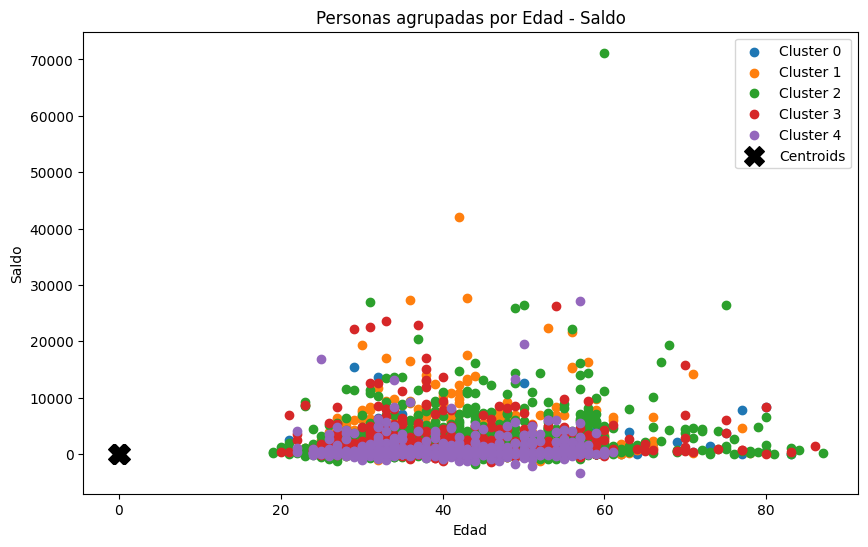

In [16]:
numero_clusters = 5
plt.figure(figsize=(10, 6))
for cluster in range(numero_clusters):
    cluster_data = df_train[df_train['Grupos'] == cluster]
    plt.scatter(cluster_data['edad'], cluster_data['saldo'], label=f'Cluster {cluster}')
plt.scatter(k_means.cluster_centers_[:, 9], k_means.cluster_centers_[:, 8], s=200, c='black', marker='X', label='Centroids')

plt.title('Personas agrupadas por Edad - Saldo')
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.legend()
plt.show()

In [17]:
grupo_2 = df_train[df_train['Grupos'] == 1]

In [18]:
grupo_2 = grupo_2[grupo_2['saldo'] >= 5000]

In [19]:
grupo_2

,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si,Grupos
60,30,6619,239,8,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
125,30,19358,258,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
135,40,10378,523,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
187,42,42045,205,2,-1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
346,33,9449,428,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,40,10786,111,3,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3980,30,6495,78,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4150,39,5803,83,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4195,30,6164,152,11,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
